# DAT200 CA4 2022

Kaggle username: Arterx

### Imports

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Reading data

In [5]:
raw_data = pd.read_csv('train.csv', index_col=0) # Naming the train data "raw_data"
test_data = pd.read_csv('test.csv', index_col=0) # Naming the test data "test_data"

### Data exploration and visualisation

In [6]:
print(raw_data.isnull().sum()) # Checking how many NaN there are
raw_data.head()

Rooms               0
Type                0
Method              0
Distance            0
Postcode            0
Bedrooms            0
Bathroom           46
Car                53
Landsize           33
YearBuilt        4572
Lattitude           0
Longtitude          0
Regionname          0
Propertycount      40
Price class         0
dtype: int64


,Rooms,Type,Method,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Price class
0,4,h,S,6.4,3011.0,3.0,1.0,2.0,411.0,NaN,-37.79690,144.90490,Western Metropolitan,7570.0,1
1,4,h,S,14.6,3189.0,4.0,1.0,2.0,638.0,1972.0,-37.93780,145.05700,Southern Metropolitan,2555.0,1
2,5,h,PI,12.4,3107.0,5.0,4.0,2.0,968.0,1970.0,-37.77083,145.11516,Eastern Metropolitan,5420.0,1
3,3,h,SP,5.2,3056.0,3.0,1.0,2.0,264.0,NaN,-37.76110,144.96440,Northern Metropolitan,11918.0,0
4,3,h,S,8.8,3072.0,3.0,1.0,2.0,610.0,NaN,-37.75100,145.01970,Northern Metropolitan,14577.0,0


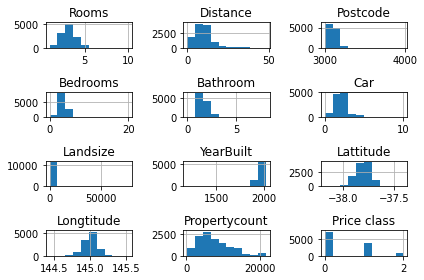

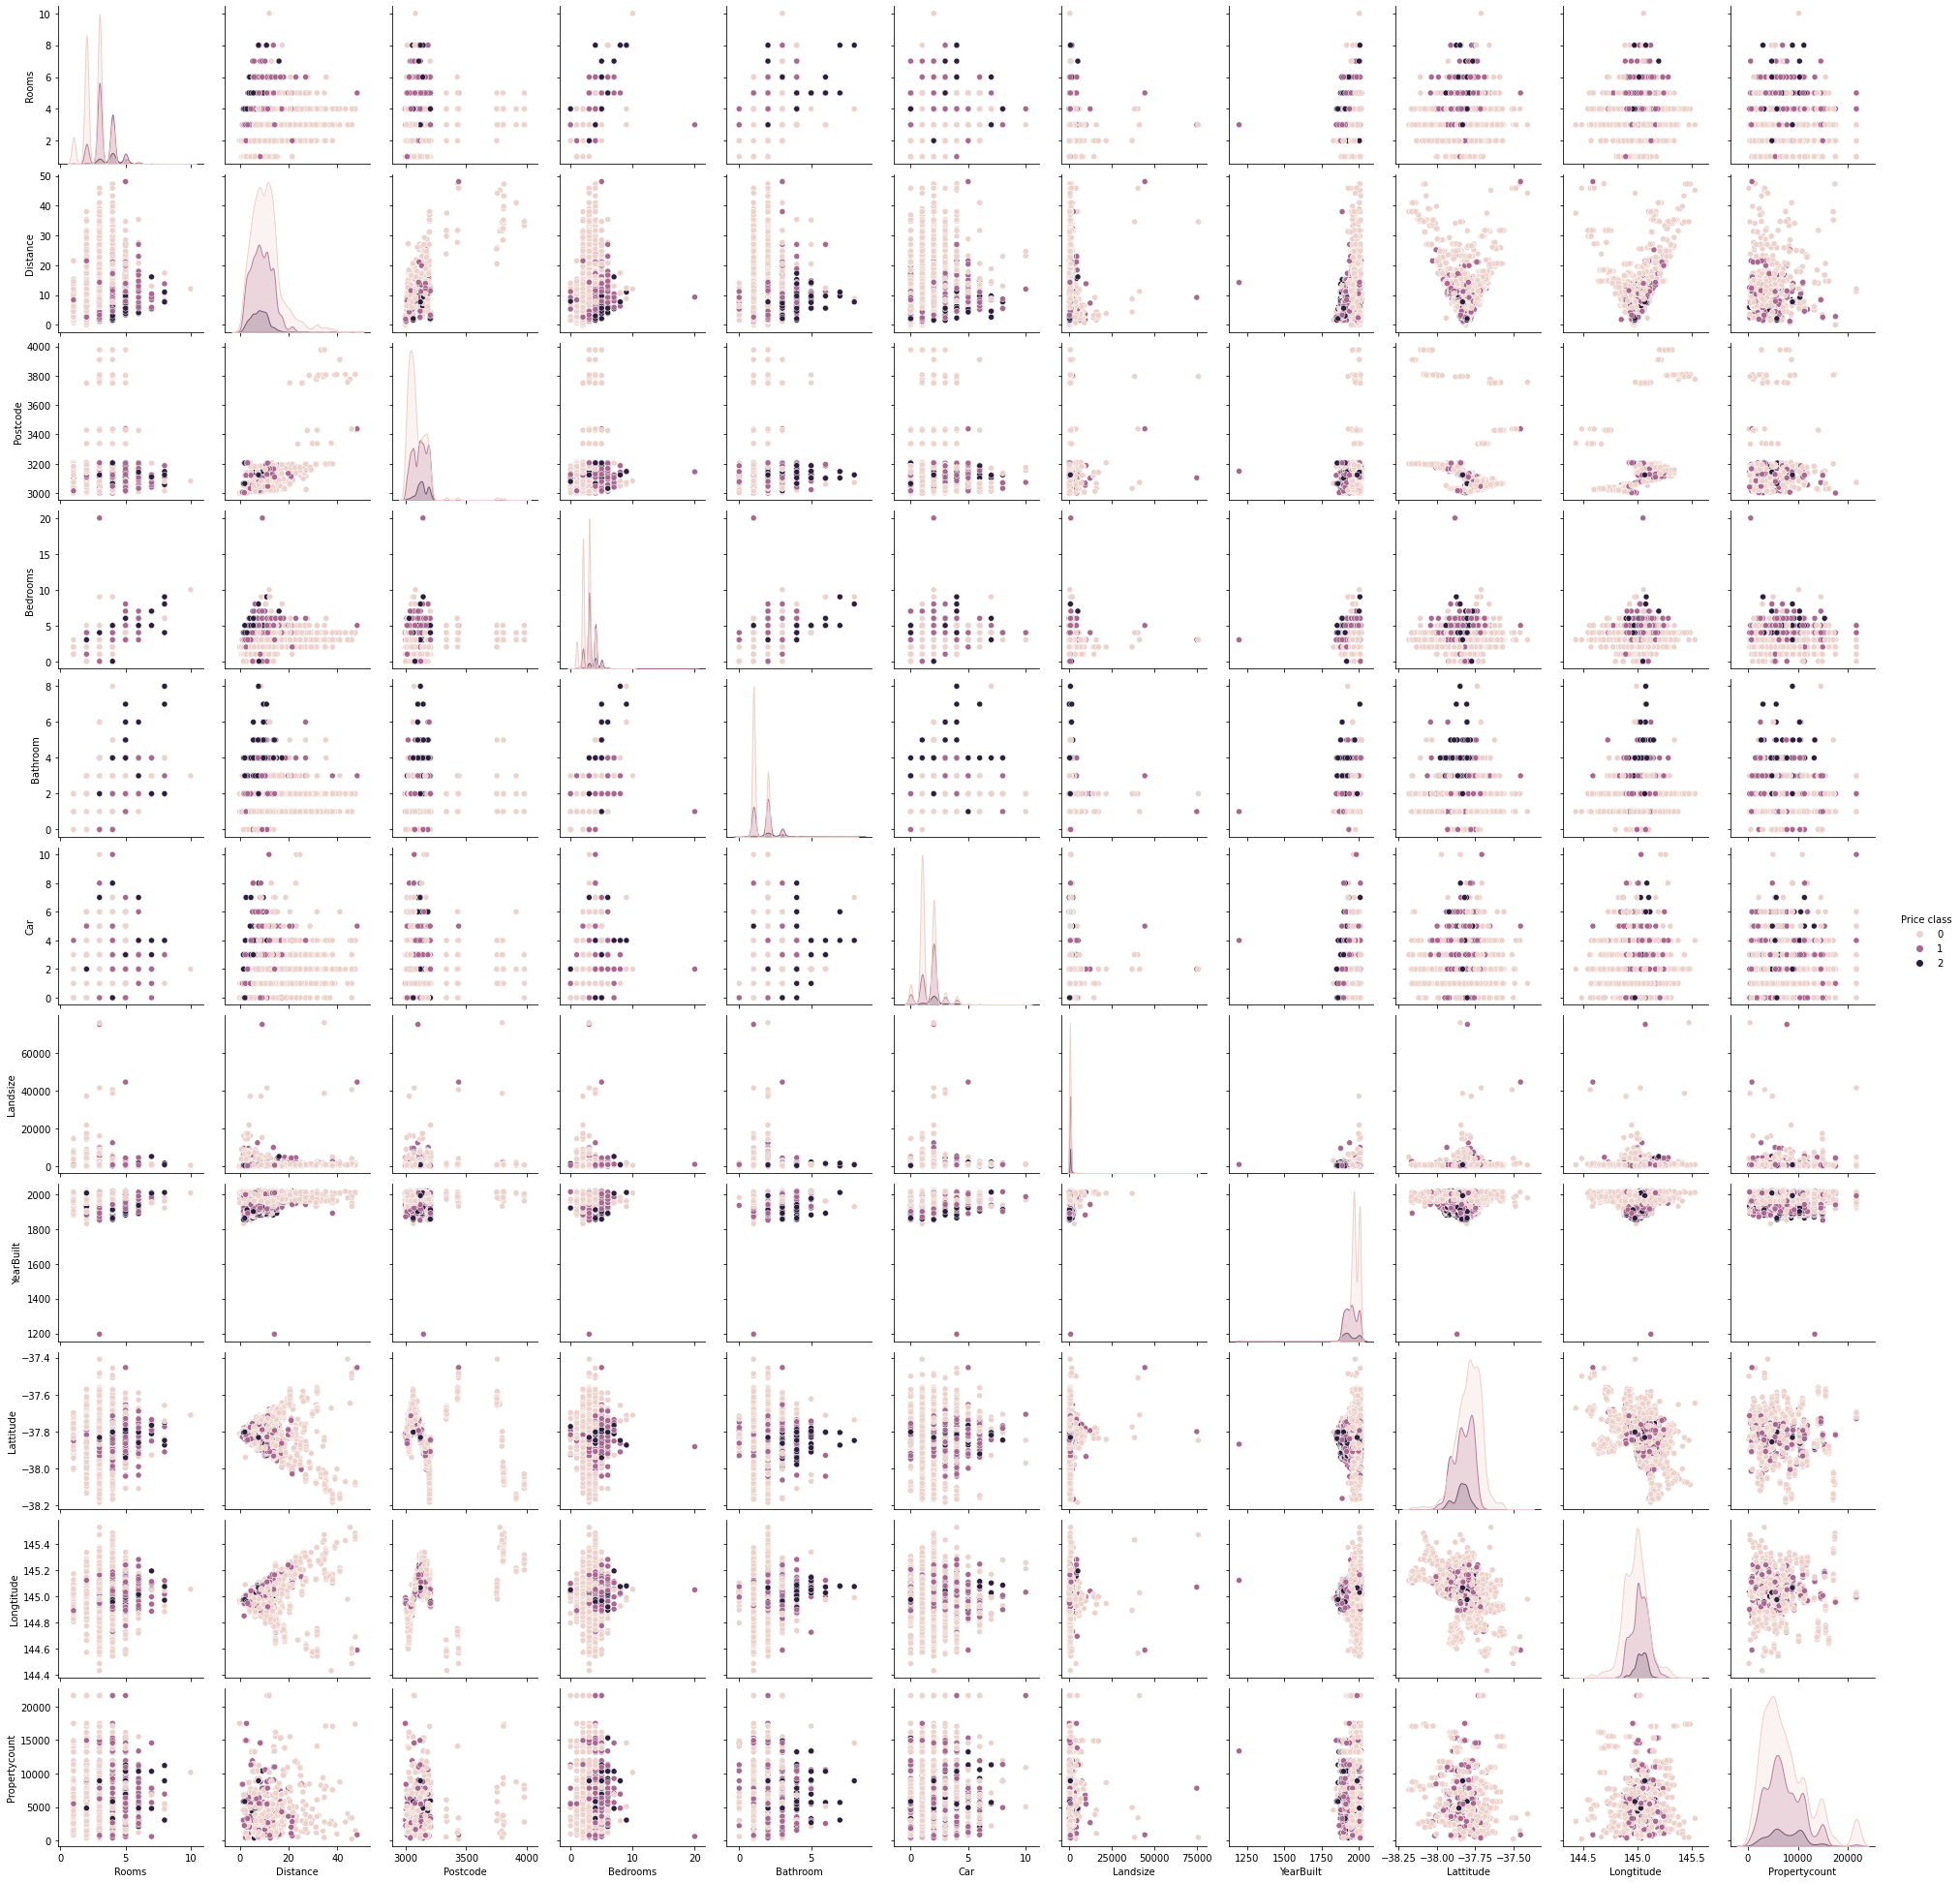

In [4]:
# Histograms below

raw_data.hist()
plt.tight_layout()
plt.show()

# Pairplots below
sns.pairplot(raw_data, hue='Price class')

### Data cleaning

In [7]:
# Using get_dummies to convert categorical values to numerical values

raw_data = pd.get_dummies(raw_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp_data = imp.fit_transform(raw_data.values)
imp_df = pd.DataFrame(data=imp_data, columns=raw_data.columns)

imp_df.head() # Checking if the imputer worked

,Rooms,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,4.0,6.4,3011.0,3.0,1.0,2.0,411.0,1970.0,-37.79690,144.90490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,14.6,3189.0,4.0,1.0,2.0,638.0,1972.0,-37.93780,145.05700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5.0,12.4,3107.0,5.0,4.0,2.0,968.0,1970.0,-37.77083,145.11516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,5.2,3056.0,3.0,1.0,2.0,264.0,1970.0,-37.76110,144.96440,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,8.8,3072.0,3.0,1.0,2.0,610.0,1970.0,-37.75100,145.01970,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Data exploration after cleaning

In [8]:
print(imp_df.isnull().sum())

Rooms                                    0
Distance                                 0
Postcode                                 0
Bedrooms                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Price class                              0
Type_t                                   0
Type_u                                   0
Method_S                                 0
Method_SA                                0
Method_SP                                0
Method_VB                                0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_

##### As seen above, all NaN values have been changed into numerical values using the imputer

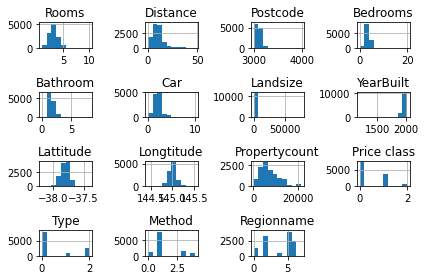

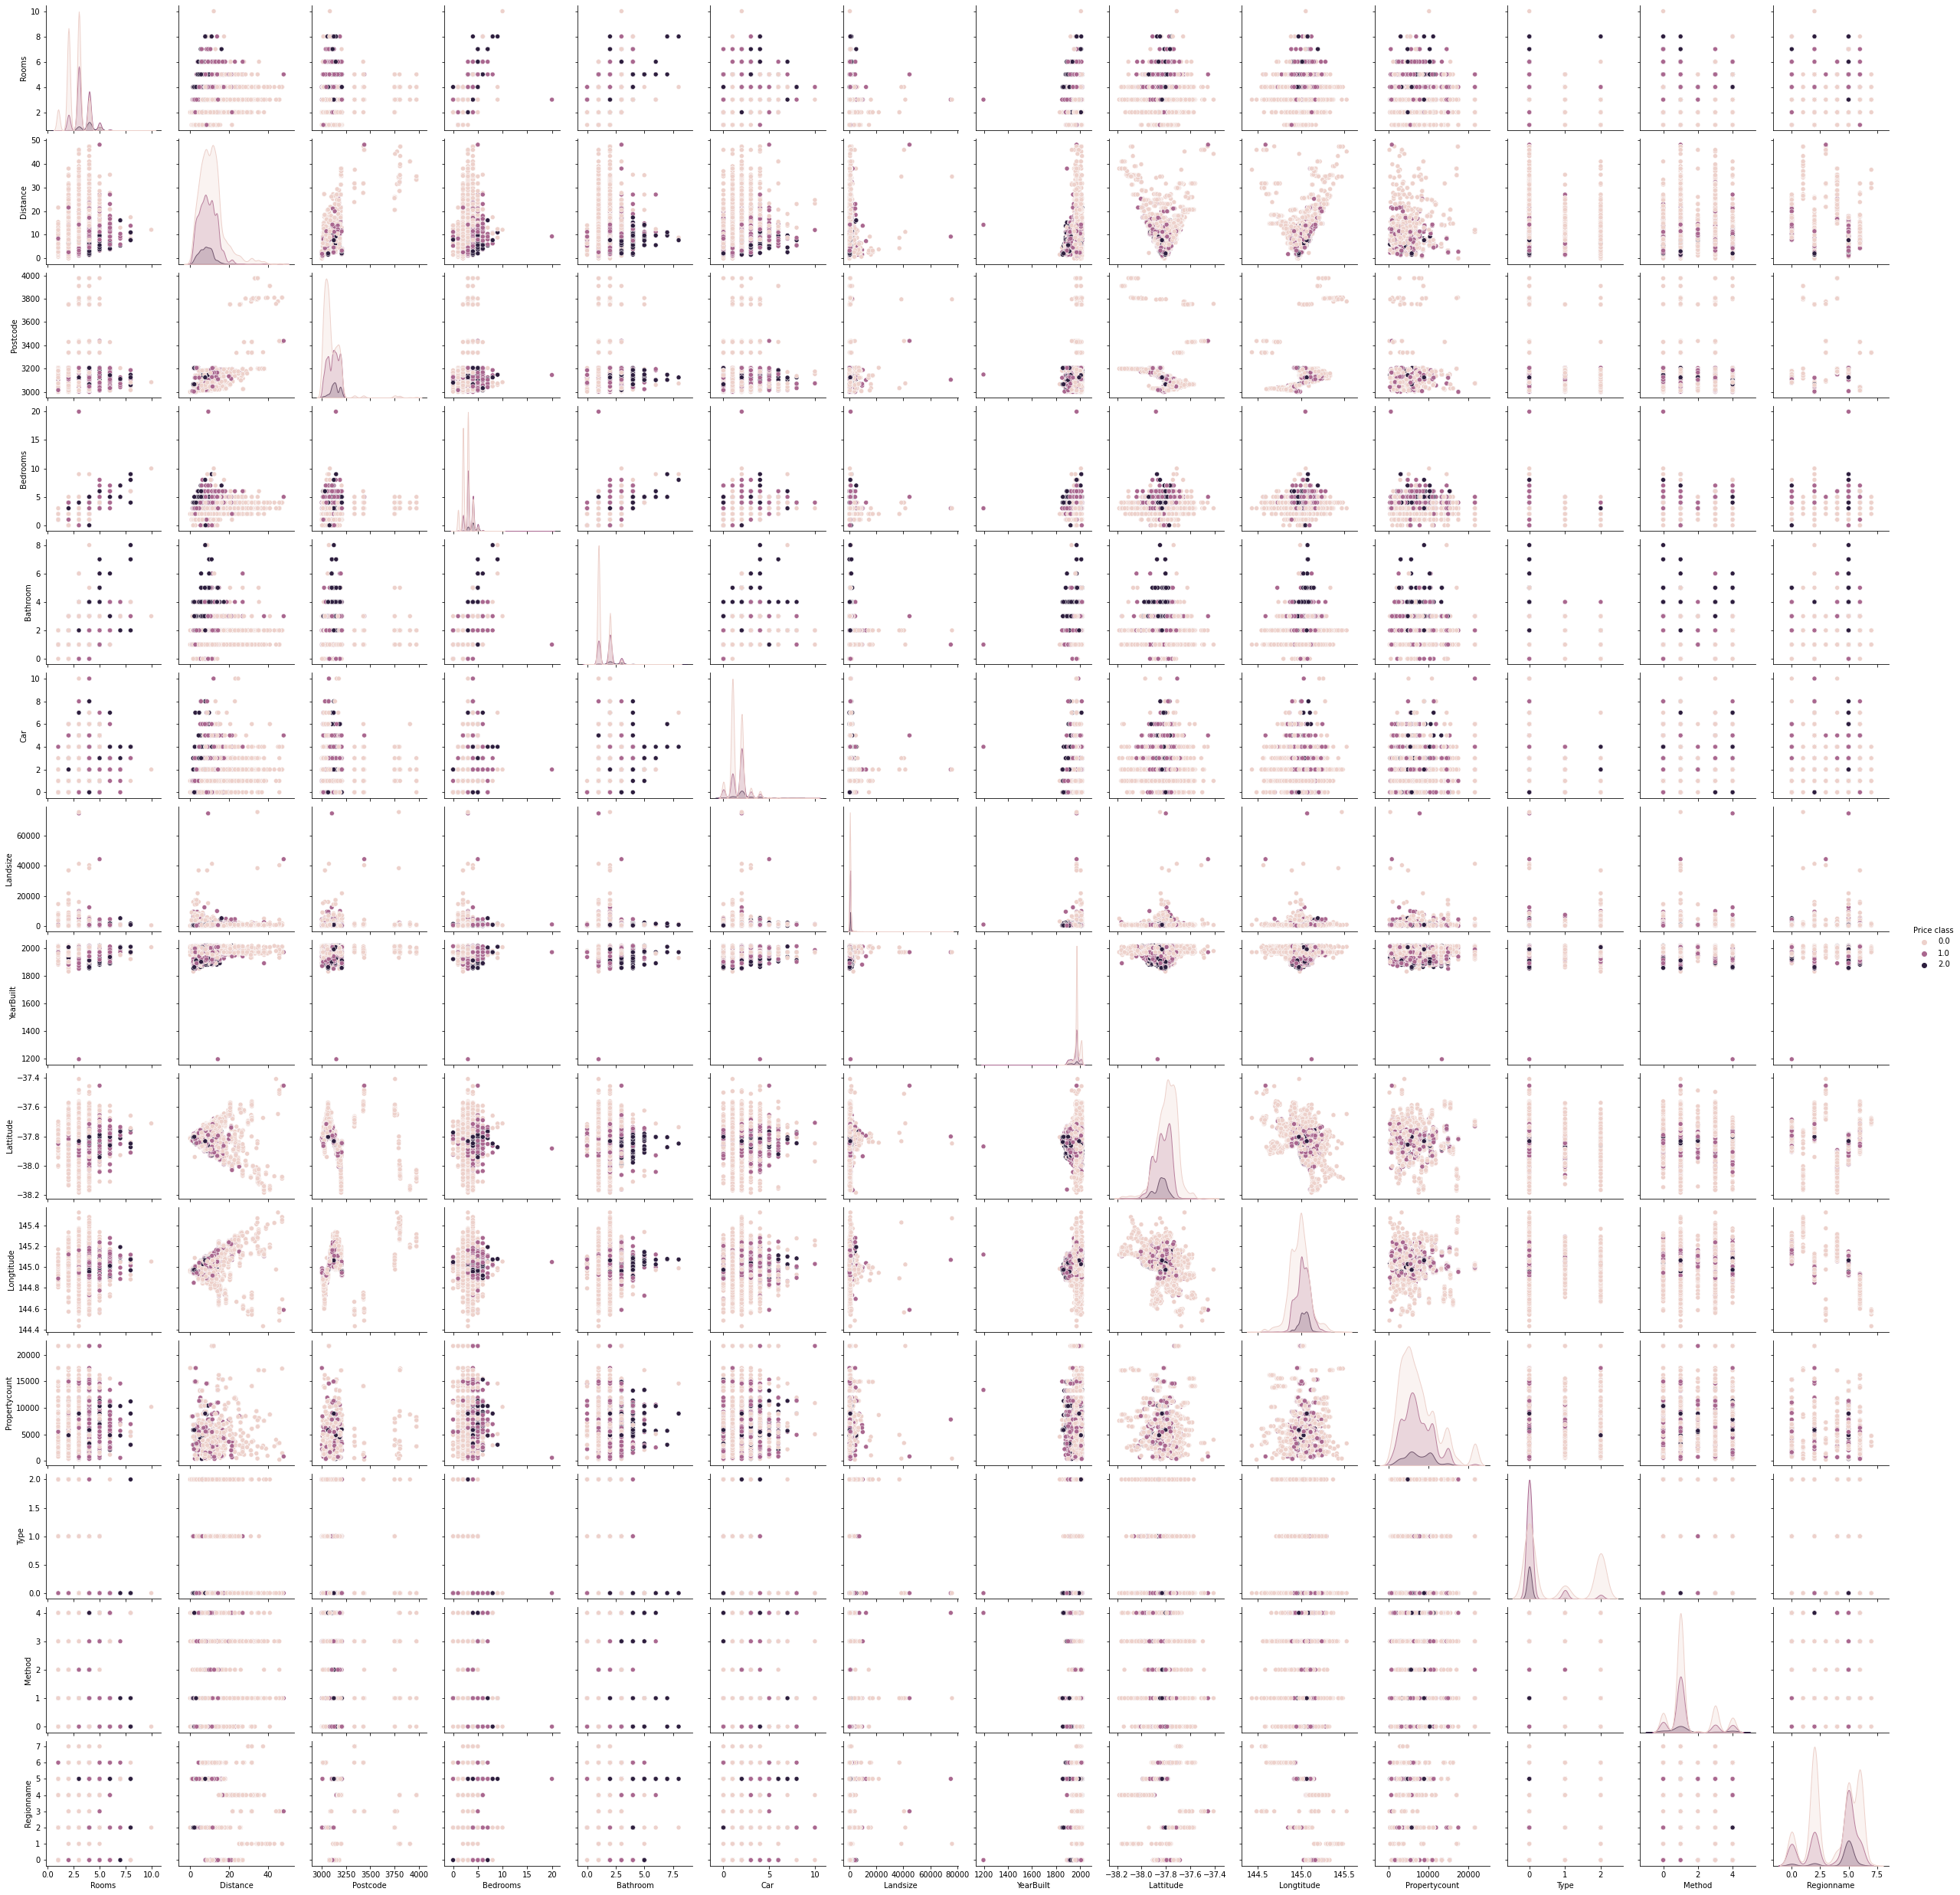

In [7]:
# Histograms

imp_df.hist()
plt.tight_layout()
plt.show()

# Pairplot

sns.pairplot(imp_df, hue='Price class')

### Data preprocessing

In [9]:
X = imp_df.drop(['Price class'], axis=1)
y = imp_df['Price class']

#### Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8080, 24) (3463, 24) (8080,) (3463,)


#### Scaling

### Modelling

#### Data pipeline with kernel

In [11]:
svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=21))

param_dist = [{'svc__C': np.arange(5, 7, 1),
'svc__kernel':['rbf', 'linear'],
'svc__gamma': ['scale', 'auto']},
              {'svc__C': np.arange(5, 7, 1),
               'svc__kernel':['linear']},]

g_search_kernel = GridSearchCV(estimator=svc_pipe,
                                     param_grid=param_dist,
                                     scoring='f1_macro',
                                     cv=5, 
                                     n_jobs=-1)

In [12]:
g_search_kernel.fit(X_train, y_train) # Finding the best parameters for SVC Kernel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=21))]),
             n_jobs=-1,
             param_grid=[{'svc__C': array([5, 6]),
                          'svc__gamma': ['scale', 'auto'],
                          'svc__kernel': ['rbf', 'linear']},
                         {'svc__C': array([5, 6]), 'svc__kernel': ['linear']}],
             scoring='f1_macro')

In [13]:
best_params = g_search_kernel.best_params_
print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'svc__C': 5, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [14]:
kernel_best =  g_search_kernel.best_estimator_
kernel_best.fit(X, y) # Fitting the best parameters into the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, random_state=21))])

In [15]:
y_pred = kernel_best.predict(test_data)

print('Kernel training data accuracy: {0:.2f}'.format(kernel_best.score(X_train, y_train)))

print('Kernel test data accuracy: {0:.2f}'.format(kernel_best.score(X_test, y_test)))

Kernel training data accuracy: 0.87
Kernel test data accuracy: 0.87


#### Kernel Submission SVC Kernel

In [16]:
# CSV file of the kernel


pred1_df = pd.DataFrame(data=y_pred)
pred1_df.reset_index(level=0, inplace=True)
pred1_df.columns = ['index', 'Price class']
pred1_df['Price class'] = pred1_df['Price class'].apply(np.int64) # Converting the float values to int

pred1_df.to_csv('Pred_kernel.csv', index=False, sep=',')

#### Data pipeline with regularization

In [17]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=21))

param_dist ={'logisticregression__penalty': ['l1', 'l2'],
             'logisticregression__solver': ['liblinear', 'saga'],
             'logisticregression__C': [0.001, 0.01, 0.1, 1]}

lr_gs = GridSearchCV(estimator=lr_pipe, param_grid=param_dist, scoring= 'f1_macro', cv=5, n_jobs=-1)

In [18]:
lr_gs.fit(X_train, y_train)
best_params = lr_gs.best_params_

print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


D:\Anaconda\envs\dat200\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
lr_best =  lr_gs.best_estimator_
lr_best.fit(X, y)

D:\Anaconda\envs\dat200\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', random_state=21,
                                    solver='saga'))])

In [20]:
y_pred = lr_best.predict(test_data)

print('LR training data accuracy: {0:.2f}'.format(lr_best.score(X_train, y_train)))

print('LR test data accuracy: {0:.2f}'.format(lr_best.score(X_test, y_test)))

LR training data accuracy: 0.81
LR test data accuracy: 0.81


#### Kaggle Submission LR

In [21]:
pred2_df = pd.DataFrame(data=y_pred)
pred2_df.reset_index(level=0, inplace=True)
pred2_df.columns = ['index', 'Price class']
pred2_df['Price class'] = pred2_df['Price class'].apply(np.int64) # Converting the float values to int

pred2_df.to_csv('Pred_lr.csv', index=False, sep=',')

#### Other models used for Kaggle submission

#### Data pipeline using Random Forest

In [22]:
forest = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=21))

param_dist = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 300],
    'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
    'randomforestclassifier__min_samples_leaf': [1, 5, 10],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__bootstrap': [True, False]
}

forest_gs = GridSearchCV(estimator=forest, param_grid=param_dist, scoring='f1_macro', cv=5, n_jobs=-1)

In [23]:
forest_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__bootstrap': [True, False],
                         'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt'],
                         'randomforestclassifier__min_samples_leaf': [1, 5, 10],
                         'randomforestclassifier__n_estimators': [50, 100, 200,
                                                                  300]},
             scoring='f1_macro')

In [24]:
best_params = forest_gs.best_params_

print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 50}


In [25]:
forest_best =  forest_gs.best_estimator_
forest_best.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        n_estimators=50, random_state=21))])

In [26]:
y_pred = forest_best.predict(test_data)

print('Forest training data accuracy: {0:.2f}'.format(forest_best.score(X_train, y_train)))

print('Forest test data accuracy: {0:.2f}'.format(forest_best.score(X_test, y_test)))

Forest training data accuracy: 0.90
Forest test data accuracy: 0.90


#### Kaggle Submission Random Forest

In [27]:
pred3_df = pd.DataFrame(data=y_pred)
pred3_df.reset_index(level=0, inplace=True)
pred3_df.columns = ['index', 'Price class']
pred3_df['Price class'] = pred3_df['Price class'].apply(np.int64) # Converting the float values to int

pred3_df.to_csv('Pred_forest.csv', index=False, sep=',')

### Final Evaluation and confusion matrix

#### Confusion matrix for SVC Kernel

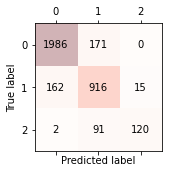

In [40]:
# confusion matrix for SVC Kernel
y_pred = kernel_best.predict(X_test)
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

#### Confusion matrix for LR

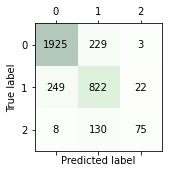

In [41]:
# Confusion matrix for LR
y_pred = lr_best.predict(X_test)
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(matrix, cmap=plt.cm.Greens, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

#### Confusion matrix for Random Forest

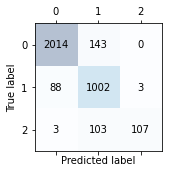

In [42]:
y_pred = forest_best.predict(X_test)
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

### Kaggle submission

#### ROC Curve for binary classificaion problem

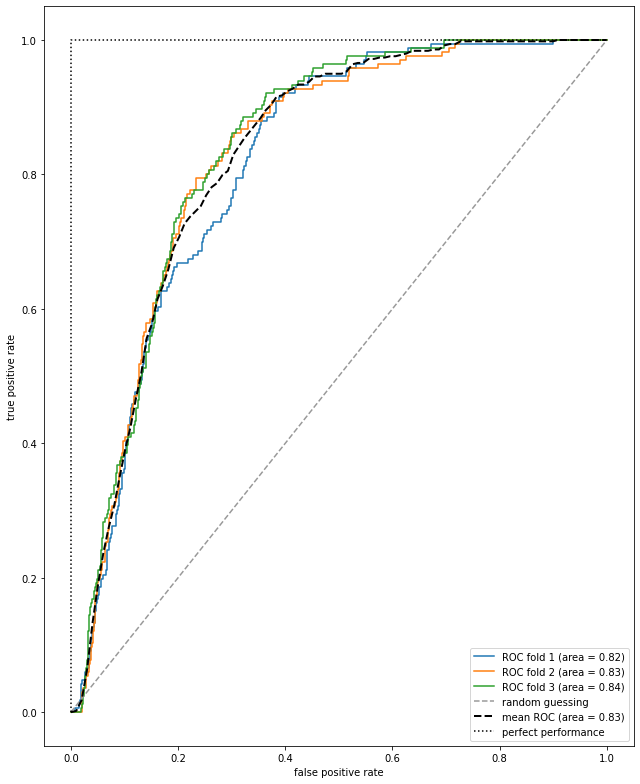

In [35]:
# Set up pipeline with scale, decomposer and classifyer
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0,
                                           solver='lbfgs'))
# Reduced variable set
X_train2 = X_train
   
# Cross-validation specification
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(9, 11))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Loop through folds of CV
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2.values[train],
                         y_train.values[train]).predict_proba(X_train2.values[test]) # Predict probability of classes

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y_train.values[test],
                                     probas[:, 1],
                                     pos_label=2)
    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

# Average True Positive Rate
mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0
# Average AUC
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
